In [70]:
library(tidyverse)
options(repr.plot.width = 10 , repr.plot.height = 6, repr.plot.res = 150,
        jupyter.plot_mimetypes = "image/png") 
theme_set(theme_classic())

# STATS 504
## Week 2
![babies](https://images.ctfassets.net/cnu0m8re1exe/PYLeBWr2QDF5yjyZwB5Iq/7509e49d1d621860c1d4c484243c23db/shutterstock_189429203.jpg)

The US Social Security Administration keeps records of every child born in the United States each year. These records are available in aggregate form in a [public database](https://www.ssa.gov/oact/babynames/).

In [66]:
# install.packages("babynames")
library(babynames)
babynames %>% head

year,sex,name,n,prop
<dbl>,<chr>,<chr>,<dbl>,<dbl>
1880,F,Mary,7065,0.07238359
1880,F,Anna,2604,0.02667896
1880,F,Emma,2003,0.02052149
1880,F,Elizabeth,1939,0.01986579
1880,F,Minnie,1746,0.01788843
1880,F,Margaret,1578,0.01616720


If you're running on Colab, you can load the data using:

In [14]:
# babynames <- read_csv("https://github.com/terhorst/stats504/raw/main/lectures/week2/babynames.csv.gz")

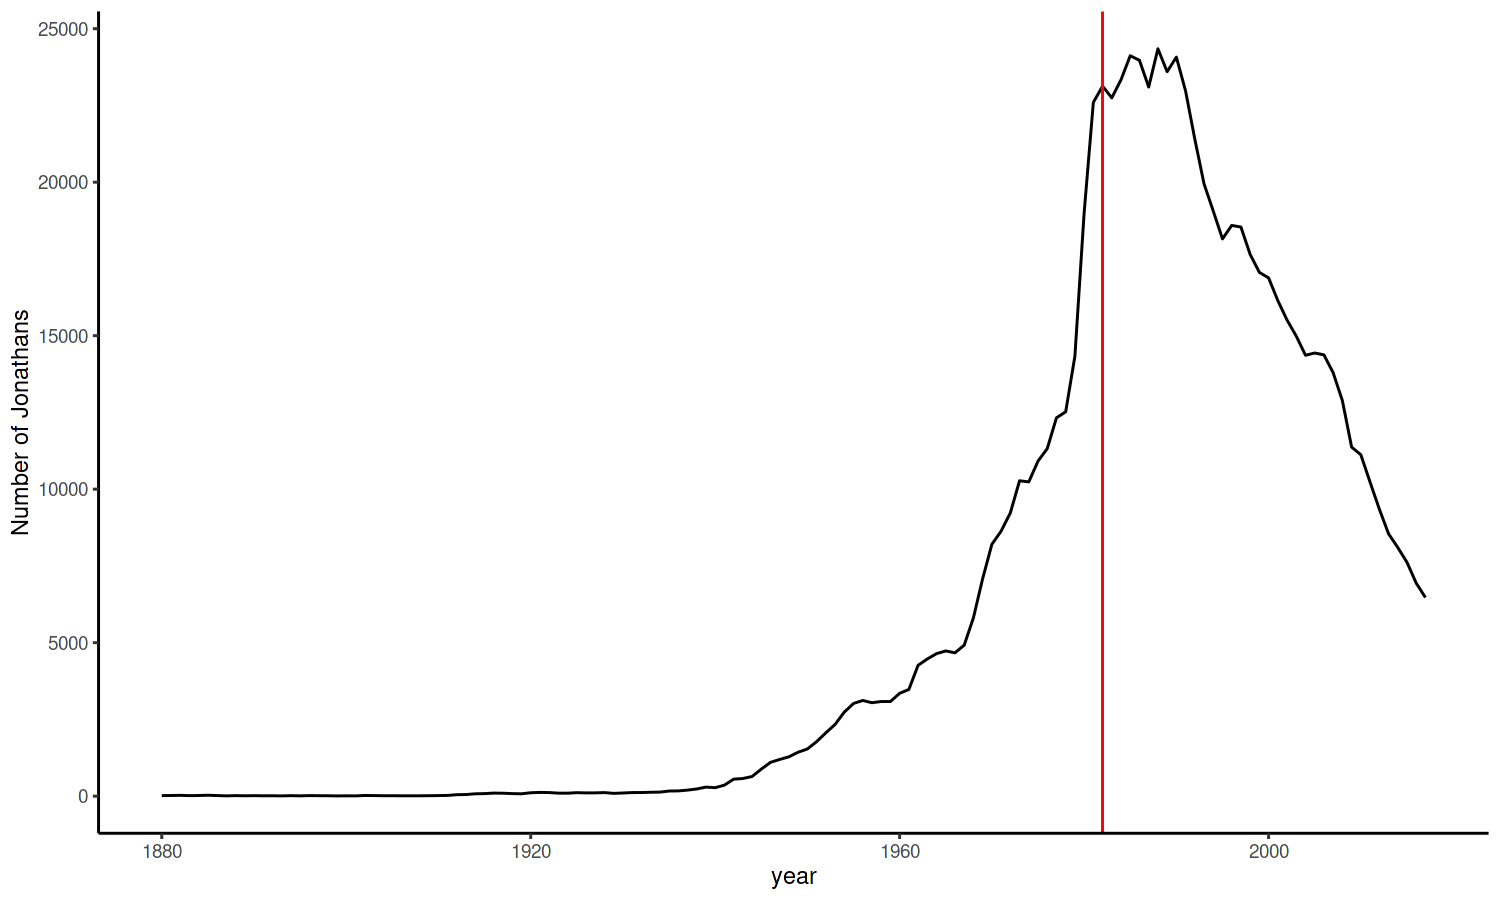

In [71]:
# number of Jonathans

<img src="https://beam-images.warnermediacdn.com/BEAM_LWM_DELIVERABLES/52dae4c7-2ab1-4bb9-ab1c-8100fd54e2f9/525e19cadd275c68e933773cc3bdad91a12fe10e.jpg?submitted=1684658977805&host=wbd-images.prod-vod.h264.io&partner=beamcom">

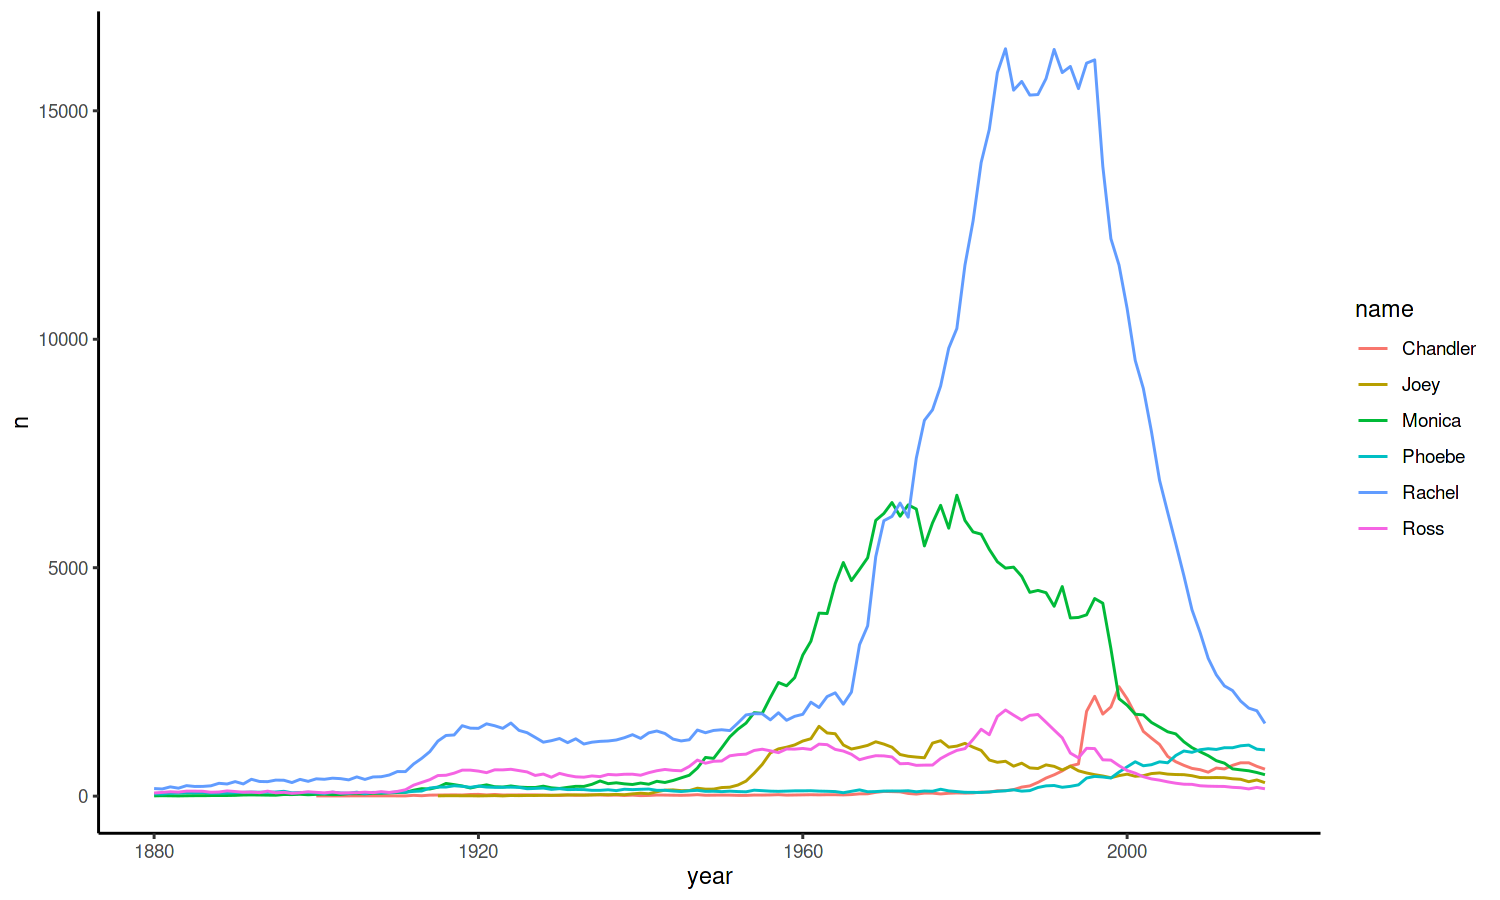

In [72]:
male.friends <- c("Chandler", "Joey", "Ross")
female.friends <- c("Monica", "Phoebe", "Rachel")

# number of friends

## Eternal names
The most common name each year is:

In [16]:
# most common name by year

# A tibble: 276 × 5
# Groups:   year, sex [276]
    year sex   name      n   prop
   <dbl> <chr> <chr> <dbl>  <dbl>
 1  1880 F     Mary   7065 0.0724
 2  1880 M     John   9655 0.0815
 3  1881 F     Mary   6919 0.0700
 4  1881 M     John   8769 0.0810
 5  1882 F     Mary   8148 0.0704
 6  1882 M     John   9557 0.0783
 7  1883 F     Mary   8012 0.0667
 8  1883 M     John   8894 0.0791
 9  1884 F     Mary   9217 0.0670
10  1884 M     John   9388 0.0765
# ℹ 266 more rows


We see that Mary and John were extremely popular names in the late 19th century.

## &#129300; Quiz

Call a name *eternal* if it is among the most 30 common names for its gender in *every* year of data. 

John is eternal, but Mary is not. Including John there are four eternal boy names, and one eternal girl name. 

What is the eternal girl's name?

<ol style="list-style-type: upper-alpha;">
    <li>Anna</li>
    <li>Elizabeth</li>
    <li>Khloe</li>
    <li>Spike</li>
    <li>Margaret</li>
</ol>

In [2]:
# eternal names

## Naming trends driven by migration
What fraction of male names ended in "o", or female names in "a", over time?

In [53]:
str_sub('Alejandro', -1)

[1] "o"

In [82]:
# What fraction of male names ended in o, or female names in a, over time?

## First letter
Does the first letter of a name show evidence of trends in popularity over time?

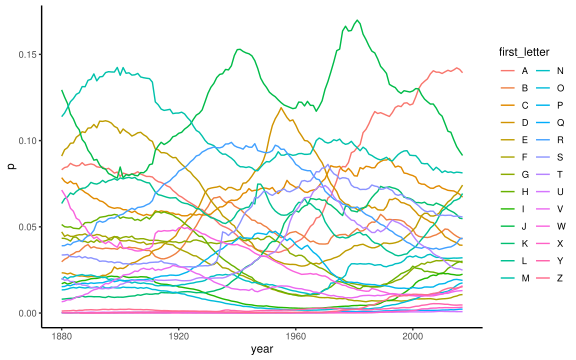

In [17]:
# first letter over time

I find this plot hard to interpret (too busy). Perhaps a table would work better. Let's look at the most common first letter by decade:

In [18]:
# most common first letter by decade

`summarise()` has grouped output by 'decade'. You can override using the `.groups` argument.


decade,first_letter,n
<fct>,<chr>,<dbl>
1880-1889,M,302499
1890-1899,M,465711
1900-1909,M,591938
1910-1919,M,1768309
1920-1929,J,2562931
1930-1939,J,2930203
1940-1949,J,4277133
1950-1959,J,4862016
1960-1969,J,4531308


## Naming diversity
Has the variety of names increased over time? How can we measure this?

- Number of unique names/year
- Inequality measure (Gini coefficient)
- Entropy

## Entropy
The entropy of a discrete probability distribution is:

$$H = -\sum_i p_i \log p_i$$

`summarise()` has grouped output by 'sex'. You can override using the `.groups` argument.


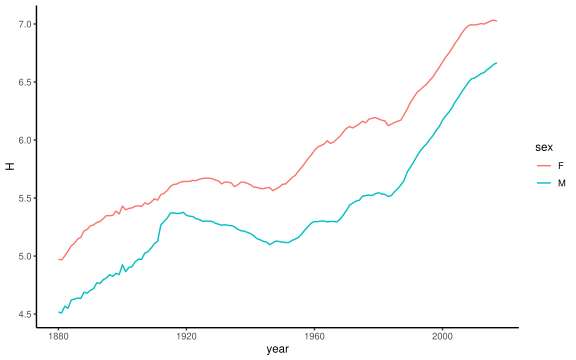

In [19]:
# entropy over time

## Gini's coefficient

Gini's coefficient is another measure of inequality in a distribution. It is defined as:

$$G = \frac{\sum_{i,j} |x_i - x_j|}{2 \bar{x} n^2}$$



Assuming $x_i\ge 0$:

- $G=0$: perfect equality.
- $G=1$: "perfect inequality": one person has everything, everyone else has nothing.
- $G \ge 0$: obvious.
- $G \le 1$: obvious?

In [52]:
gini <- function(xs) {
    n <- length(xs)
    D <- dist(xs, diag=T, upper=T) %>% as.matrix
    mean(D) / 2 / mean(xs)
}

gini(c(1,1,123))

[1] 0.6506667

In [53]:
# install.packages('dineq')
library(dineq)
gini.wtd(c(1,1,123))

[1] 0.6506667

In [55]:
# gini index over time

## Age vs. name
Can you accurately predict someone's age based on their name and sex at birth? How should we approach this question?

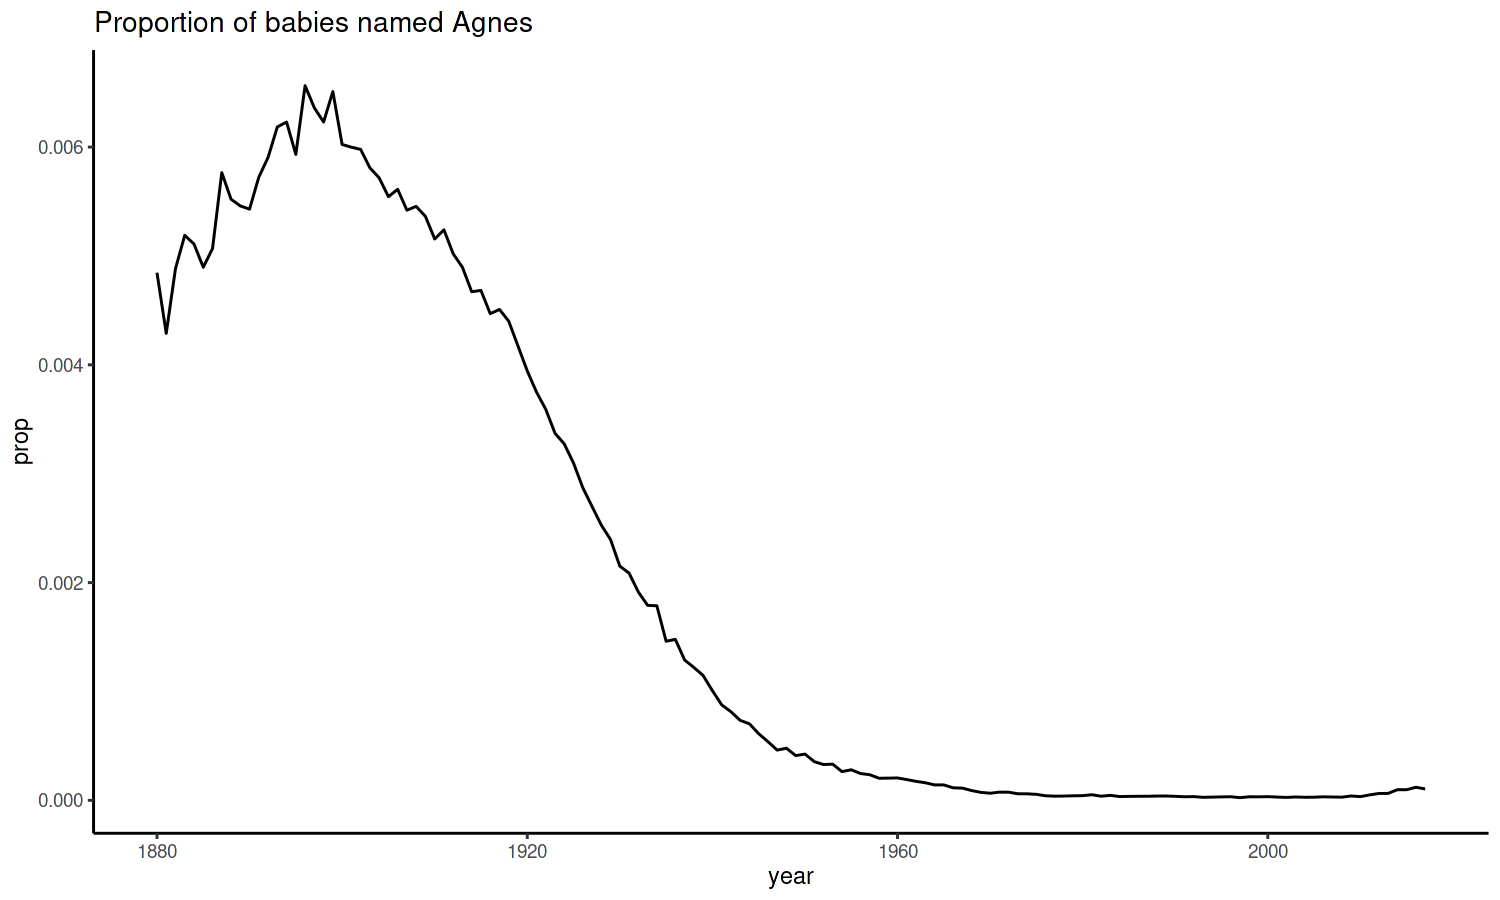

In [73]:
# babies named agnes

## Modeling
When predicting someone's age based on name, we have to take into account two factors:

- When were the most babies born with that name?
- What is the likelihood that a person born in that year is still alive today?

This naturally leads to an application of Bayes rule.

## Bayesian model




\begin{gather}
\mathbb{P}(\text{age}=a\mid\text{name})=\mathbb{P}(\text{birth year}=2024-a\mid\text{name})
\\=\mathbb{P}(\text{name}\mid\text{birth year}=2024-a)\frac{\mathbb{P}(\text{birth year}=2024-a)}{\mathbb{P}(\text{name})} \\
\propto  \mathbb{P}(\text{name}\mid\text{birth year}=2024-a)\mathbb{P}(\text{birth year}=2024-a)
\end{gather}

What are the quantities we would need to estimate?
- $\mathbb{P}(\text{age}=a\mid\text{name})=\mathbb{P}(\text{birth year}=2024-a\mid\text{name})$:  ✅ 
- $\mathbb{P}(\text{birth year}=2024-a)$: the age distribution of the current population.

## Age distribution of the current population
- The US Census has this information [readily available](https://www.census.gov/popclock/data_tables.php?component=pyramid). 
- (I downloaded the table by hand since their website makes it hard to automate.)

In [50]:
read_csv('United States Population by Age and Sex.csv', skip=1) %>% 
    mutate(across(1:3, \(x) str_replace_all(x, "[^\\d.]", "") %>% as.numeric)) %>% 
    slice(1:101) -> ages

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 307 Columns: 3
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Age, Male % of Population, Female % of Population

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


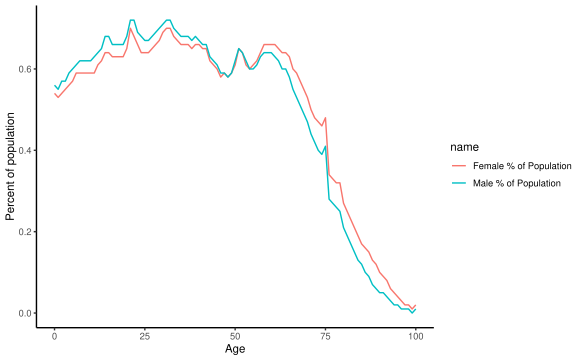

In [92]:
ages %>% 
    pivot_longer(cols=2:3, values_to = "Percent of population") %>%
    ggplot(aes(x=Age, y=`Percent of population`, color=name)) +
    geom_line()

## Putting it together

Warning message:
“Removed 5 rows containing missing values (`geom_line()`).”


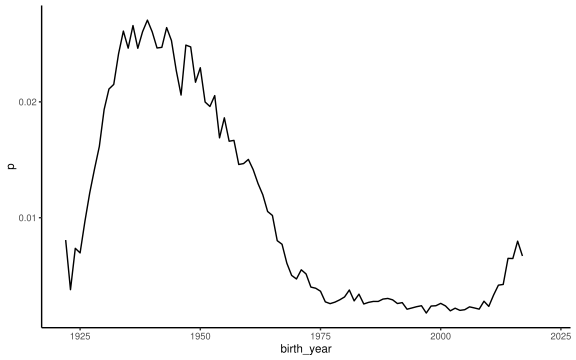

In [106]:
ages %>% mutate(birth_year = 2022 - Age) %>% 
    select(c(1, 3, 4)) %>% 
    left_join(filter(babynames, name == "Agnes", sex == "F"), 
               by=c("birth_year" = "year")) %>% 
    mutate(p = prop * `Female % of Population`, p = p / sum(p, na.rm = T)) %>% 
    ggplot(aes(x = birth_year, y=p)) + geom_line()

## Other options
- Supervised learning: build a prediction function $f(\text{name}) \to \text{age}$.
- Two important questions:
    - What sort of data would be needed?
    - What sort of prediction function $f$?


## Getting the data

- The Social Security administration also has individual-level data on births and deaths.
- It is called the [Death Master File](https://en.wikipedia.org/wiki/Death_Master_File).
- It is no longer available to the public.

## Getting the data
- But it used to be.
- The last release (2014) has been archived on [Archive.org](https://archive.org/download/DeathMasterFile).
- Too big to post to the course Github, but you can download these files on your own.

## Professional data scientists: what do you do all day

<img src="https://www.anaconda.com/wp-content/uploads/2023/02/Stacked-Chart.svg" />
Source: https://www.anaconda.com/resources/whitepapers/state-of-data-science-2020

## The raw data
- Let's examine in Unix.
- What is this format?

## Fixed-width file
- Each data field has a fixed width.
- Characters in each column are aligned in fixed positions.
- Common in legacy systems and data transfer.
- Advantages:
  - Easy to parse (fixed column positions).
  - Consistent record lengths.
- Disadvantages:
  - Inefficient space usage.
  - Difficult to read without a format guide.

Example:

    | Name      | Age | City       |
    |-----------|-----|------------|
    | John Doe  | 28  | New York   |
    | Jane Smith| 32  | Los Angeles|


## Layout for `ssdm` files
- Layout is undocumented in the data source.
- I tried Googling and found [this document](https://ladmf.ntis.gov/Help/RecordLayout) which looks correct.

In [45]:
library(readr)

columns <- c("status", "ssn", "last_name", "name_suffix", "first_name", "middle_name",
             "vp_code", "death_date", "birth_date", "blanks1", "blanks2",
             "blanks3", "blanks4", "blanks5")

layout <- fwf_widths(c(1, 9, 20, 4, 15, 15, 1, 8, 8, 2, 5, 5, 5, 7),
                     col_names = columns)

ssdm <- read_fwf("/mnt/turbo/jonth/datasets/DeathMasterFile/ssdm1", layout, n_max = 100000) 

sample

Rows: 100000 Columns: 14
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────

chr (8): ssn, last_name, name_suffix, first_name, middle_name, vp_code, deat...
lgl (6): status, blanks1, blanks2, blanks3, blanks4, blanks5

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [49]:
## Cleaning the data
library(lubridate)
ssdm %>% select(first_name, death_date, birth_date) %>% 
    head  # mutate(death_date = mdy(death_date)) %>% head

first_name,death_date,birth_date
<chr>,<chr>,<chr>
GRACE,12001975,04161902
ROGER,04001969,02041892
KENNETH,03001976,04241904
LEON,08301987,06141908
OLIVE,09001981,09211908
FRANK,09001962,04061888


In [215]:
parse_mmddyyyy <- function(date_string) {
  # Replace '00' day with '01'
  date_string <- ifelse(substr(date_string, 3, 4) == "00", 
           paste0(substr(date_string, 1, 2), "01", substr(date_string, 5, 8)),
           date_string)
  mdy(date_string)
}

parse_mmddyyyy(c("12001970", c("01001980")))

[1] "1970-12-01" "1980-01-01"

In [62]:
ssdm %>% select(first_name, ends_with("date")) %>% 
    mutate(
        across(ends_with("date"), parse_mmddyyyy),
    ) %>% print ->
    ssdm_cleaned

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(ends_with("date"), parse_mmddyyyy)`.
Caused by warning:
!  112 failed to parse.”


# A tibble: 100,000 × 3
   first_name death_date birth_date
   <chr>      <date>     <date>    
 1 GRACE      1975-12-01 1902-04-16
 2 ROGER      1969-04-01 1892-02-04
 3 KENNETH    1976-03-01 1904-04-24
 4 LEON       1987-08-30 1908-06-14
 5 OLIVE      1981-09-01 1908-09-21
 6 FRANK      1962-09-01 1888-04-06
 7 CHESTER    1984-02-01 1910-02-16
 8 DIMITRI    1981-03-01 1910-06-04
 9 WILLIAM    1970-12-01 1907-11-07
10 MINNIE     1984-03-01 1895-04-05
# ℹ 99,990 more rows


## Sanity checks
- When you parse messy data like this, it's important to do some basic checks to make sure that nothing went wrong.
- "Basic checks": do the variables have the correct?:
  - Magnitude?
  - Sign?
  - Ordering?


In [65]:
# min(ssdm_cleaned$birth_date, na.rm=T)
# sum(year(ssdm_cleaned$birth_date) == 0, na.rm = T)
filter(ssdm_cleaned, year(birth_date) == 0)

first_name,death_date,birth_date
<chr>,<date>,<date>
SHELBY,1960-04-01,0-09-04
WILLIAM,1961-07-01,0-04-10
OMER,1954-03-01,0-01-13
TRUE,1959-02-01,0-08-23
JAMES,1949-11-01,0-04-23
WILLIAM,1960-08-01,0-06-14
JOSEPH,1947-03-01,0-03-18
GUY,1953-11-01,0-06-28
EMILE,1959-11-01,0-05-07


In [104]:
sum(is.na(ssdm_cleaned$birth_date))

[1] 112

In [105]:
sum(is.na(ssdm_cleaned$death_date))

[1] 0

In [66]:
sum(ssdm_cleaned$birth_date > ssdm_cleaned$death_date, na.rm=T)

[1] 0

## Sanity check: Comparing with `babynames`
- `ssdm`, tells us among other things, how many people with each name were born in each year.
- How does it compare to the other data source (produced by same agency) that we have?

In [139]:
ssdm_cleaned %>% mutate(y = year(birth_date)) %>% select(first_name, y) %>%
    count(y, first_name) %>% filter(y == 1940) %>% top_n(10)

Selecting by n


y,first_name,n
<dbl>,<chr>,<int>
1940,CHARLES,9
1940,DAVID,10
1940,DONALD,12
1940,GEORGE,10
1940,JAMES,10
1940,JOHN,10
1940,RICHARD,21
1940,ROBERT,28
1940,RONALD,9


In [69]:
library(babynames)
babynames_ns <- babynames %>% group_by(year, name) %>% summarize(n = sum(n))

ssdm_cleaned %>% mutate(year = year(birth_date), name=str_to_title(first_name)) %>% 
    select(name, year) %>%
    count(year, name) %>% filter(year == 1940) %>% 
    left_join(babynames_ns, join_by(name == name, year == year))  %>% print ->
    ss_name_joined

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.


# A tibble: 255 × 4
    year name     n.x   n.y
   <dbl> <chr>  <int> <int>
 1  1940 A          4    NA
 2  1940 Alan       2  2382
 3  1940 Albert     5  5608
 4  1940 Alfred     2  3076
 5  1940 Alice      3  7636
 6  1940 Allan      1  1615
 7  1940 Allen      1  3047
 8  1940 Alton      1   697
 9  1940 Alvin      1  1922
10  1940 Andre      3   123
# ℹ 245 more rows


In [71]:
lm(n.x ~ n.y, ss_name_joined) %>% summary
sqrt(0.61)


Call:
lm(formula = n.x ~ n.y, data = ss_name_joined)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6740 -0.5157 -0.0623  0.1510 13.2212 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.265e-01  1.398e-01    6.63 2.47e-10 ***
n.y         2.256e-04  1.198e-05   18.84  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.818 on 225 degrees of freedom
  (28 observations deleted due to missingness)
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6102 
F-statistic: 354.7 on 1 and 225 DF,  p-value: < 2.2e-16


[1] 0.781025

## Predicting based on `ssdn`
- how could we use `ssdn` to improve our predictions?
- I need a big array $N$ such that 

$$N[n,x,y] = \text{number of people named $n$, born in $x$, alive in $y$}$$

- This is too big to compute all at once! (Dimensions?)

- Let's see how this works with the name "John".

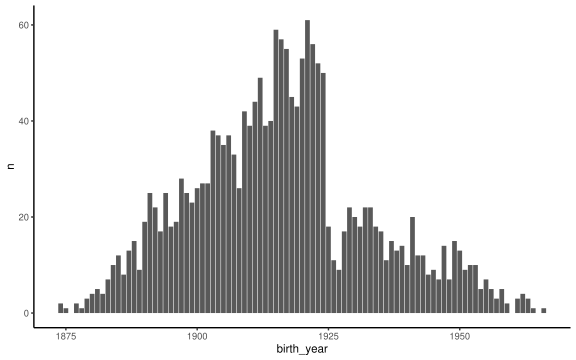

In [230]:
filter(ssdm_cleaned, first_name == "JOHN") %>% 
    drop_na(ends_with("date")) %>%   
    rowwise() %>%
    mutate(lifespan = list(year(birth_date):year(death_date))) %>%
    unnest(lifespan) %>% 
    mutate(birth_year = year(birth_date)) %>% 
    count(birth_year, lifespan) %>%
    filter(lifespan == 1970) %>% 
    ggplot(aes(x = birth_year, y = n)) + geom_col()

If we had loaded the complete data, then the number of John's born in 1940 who were still alive in 2000 would be 54985 minus:

In [156]:
# filter(ssdm_cleaned, first_name == "JOHN", 
#        year(birth_date) == 1940, 
#        year(death_date) > 2000) %>% 
#     nrow

[1] 3

So in general:

In [2]:
# ssdm_cleaned %>% 
#     drop_na(birth_date, death_date) %>% 
#     rowwise() %>% 
#     mutate(year = list(year(birth_date):year(death_date))) %>% 
#     unnest(year) %>%
#     group_by(first_name, year) %>% 
#     summarise(alive = n(), .groups = 'drop')